# Load data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./cleaned_data/Melbourne_housing_CLEANED.csv')

In [3]:
# You can use head to preview the data
df.head()

,Suburb,Rooms,Type,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea
0,Abbotsford,2,h,1035000,2.5,2,1,0,156,79.0,1900,Yarra City Council
1,Abbotsford,3,h,1465000,2.5,3,2,0,134,150.0,1900,Yarra City Council
2,Abbotsford,4,h,1600000,2.5,3,1,2,120,142.0,2014,Yarra City Council
3,Abbotsford,3,h,1876000,2.5,4,2,0,245,210.0,1910,Yarra City Council
4,Abbotsford,2,h,1636000,2.5,2,1,2,256,107.0,1890,Yarra City Council


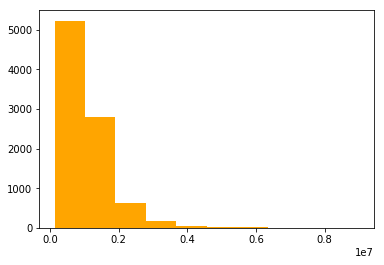

In [19]:
# Even better, use matplotlib to get more understanding of the data.
import matplotlib.pyplot as plt
prices = df['Price']
plt.hist([prices], color=['orange'])
plt.show()

# Scrub the data

**Usually the raw data is not clean. We need to scrub it before use. For simplicity, the input data is already preprocessed, so below we just drop the rows that have missing values**

In [5]:
df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

# Set up the data

**Convert Columns that contain non-numerical data to numerical values using one-hot encoding.**

In [6]:
features_df = pd.get_dummies(df, columns=['Suburb', 'CouncilArea', 'Type'])

In [7]:
del features_df['Price'] # This removes the labels from the features

** Next, create X and y arrays from the dataset. The X array contains the independent variables and the y array contains the dependent variable of Price. **

In [8]:
X = features_df.values
y = df['Price'].values

** Split the dataset into training and test. Here we do 70/30 and we use *Scikit-learn* **

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = True)

## Select the algorithm and configure its hyperparameters

** Here we are going to use the gradient boosting algorithm for this exercise. Again, we can rely on *Scikit-learn* **

In [11]:
from sklearn import ensemble

In [12]:
model = ensemble.GradientBoostingRegressor(
    n_estimators=250, 
    learning_rate=0.1, 
    max_depth=5, 
    min_samples_split=4,
    min_samples_leaf=6,
    max_features=0.6,
    loss='huber'
) # select the model

In [13]:
model.fit(X_train, y_train) # train the model

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='huber', max_depth=5,
             max_features=0.6, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=6, min_samples_split=4,
             min_weight_fraction_leaf=0.0, n_estimators=250,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

** Lastly, we can dump the model to a file so that in the future we can directly use the model to predict new real estate prices without needing to rebuild the model from scratch **

In [14]:
from sklearn.externals import joblib
joblib.dump(model, 'house_trained_model.pkl')

['house_trained_model.pkl']

## Evaluate the results

** After we have a trained model, we need to evaluate it. Sometimes it can have problems. For example, it can perform extremely well on the training set but significantly worse on the test set. Sometimes, it performs ok, but you would like to tune the parameters and compare the results to select the best set of parameters. **

** For this exercise, we use mean absolute error to evaluate the accuracy **

In [15]:
from sklearn.metrics import mean_absolute_error

In [16]:
# Training set
mse = mean_absolute_error(y_train, model.predict(X_train))
print ("Training Set Mean Absolute Error: %.2f" % mse)

Training Set Mean Absolute Error: 123052.26


In [17]:
# Test set
mse = mean_absolute_error(y_test, model.predict(X_test))
print ("Test Set Mean Absolute Error: %.2f" % mse)

Test Set Mean Absolute Error: 161613.08
